#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Mendeteksi_Buah_Sayur/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Mendeteksi_Buah_Sayur/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [5]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=31)

Epoch 1/31
98/98 [==============================] - 70s 662ms/step - loss: 0.9776 - accuracy: 0.7596 - val_loss: 1.0320 - val_accuracy: 0.8120
Epoch 2/31
98/98 [==============================] - 70s 665ms/step - loss: 0.9049 - accuracy: 0.7644 - val_loss: 0.7199 - val_accuracy: 0.8661
Epoch 3/31
98/98 [==============================] - 73s 683ms/step - loss: 0.7456 - accuracy: 0.7917 - val_loss: 0.6739 - val_accuracy: 0.8775
Epoch 4/31
98/98 [==============================] - 72s 659ms/step - loss: 0.7403 - accuracy: 0.7958 - val_loss: 0.8159 - val_accuracy: 0.8746
Epoch 5/31
98/98 [==============================] - 72s 674ms/step - loss: 0.6657 - accuracy: 0.8122 - val_loss: 0.9022 - val_accuracy: 0.8462
Epoch 6/31
98/98 [==============================] - 71s 676ms/step - loss: 0.7282 - accuracy: 0.7990 - val_loss: 0.8776 - val_accuracy: 0.8661
Epoch 7/31
98/98 [==============================] - 71s 659ms/step - loss: 0.6063 - accuracy: 0.8331 - val_loss: 0.6249 - val_accuracy: 0.9088

##Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 61s 559ms/step - loss: 0.0940 - accuracy: 0.9714
Training accuracy: 0.9714285731315613


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 9s 148ms/step - loss: 0.2874 - accuracy: 0.9516
Validation accuracy: 0.9515669345855713


##Saving Model

In [20]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
training_history.history #Return Dictionary of history

{'loss': [0.9775614142417908,
  0.9049018621444702,
  0.7455915808677673,
  0.7403424382209778,
  0.6656784415245056,
  0.7281782031059265,
  0.6062873601913452,
  0.5627377033233643,
  0.6296562552452087,
  0.5158950686454773,
  0.5167809128761292,
  0.527334451675415,
  0.5212207436561584,
  0.4736047685146332,
  0.4394164979457855,
  0.4800109565258026,
  0.5217275619506836,
  0.41737669706344604,
  0.35583260655403137,
  0.37294894456863403,
  0.40056172013282776,
  0.30368494987487793,
  0.3584151566028595,
  0.38666242361068726,
  0.36115387082099915,
  0.2941390872001648,
  0.25022241473197937,
  0.24333308637142181,
  0.27909043431282043,
  0.3010464608669281,
  0.2556228041648865],
 'accuracy': [0.7595505714416504,
  0.7643659710884094,
  0.7916532754898071,
  0.7958266735076904,
  0.812199056148529,
  0.7990369200706482,
  0.8330658078193665,
  0.8468700051307678,
  0.837239146232605,
  0.8552166819572449,
  0.8642054796218872,
  0.8632423877716064,
  0.8603531122207642,
  0.

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.15669345855713 %


#Accuracy Visualization

##Training Visualization

In [25]:
training_history.history['accuracy']

[0.7595505714416504,
 0.7643659710884094,
 0.7916532754898071,
 0.7958266735076904,
 0.812199056148529,
 0.7990369200706482,
 0.8330658078193665,
 0.8468700051307678,
 0.837239146232605,
 0.8552166819572449,
 0.8642054796218872,
 0.8632423877716064,
 0.8603531122207642,
 0.874799370765686,
 0.8857142925262451,
 0.8754414319992065,
 0.8654895424842834,
 0.8898876309394836,
 0.908507227897644,
 0.9065810441970825,
 0.9043338894844055,
 0.9187800884246826,
 0.9056179523468018,
 0.9081861972808838,
 0.9069020748138428,
 0.9252006411552429,
 0.9309791326522827,
 0.9383627772331238,
 0.9255216717720032,
 0.9223114252090454,
 0.9390048384666443]

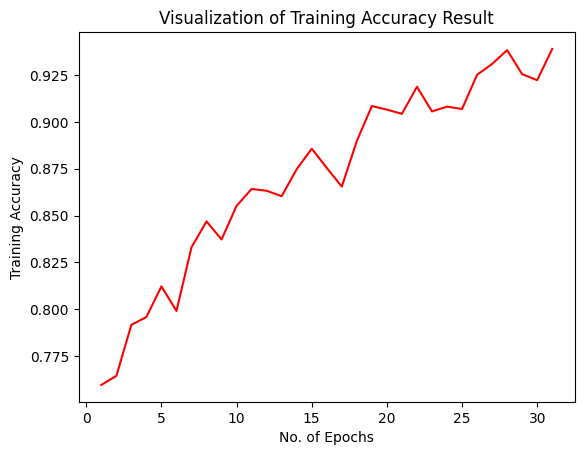

In [27]:
epochs = [i for i in range(1,32)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

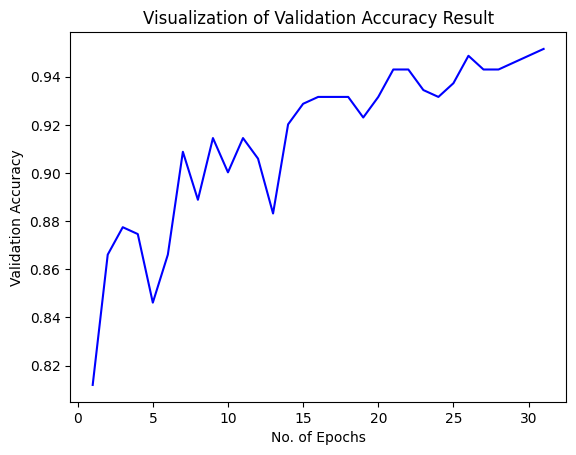

In [28]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [29]:
training_loss,training_accuracy = cnn.evaluate(training_set)

98/98 [==============================] - 62s 559ms/step - loss: 0.0940 - accuracy: 0.9714


In [30]:
val_loss,val_accuracy = cnn.evaluate(validation_set)

11/11 [==============================] - 8s 153ms/step - loss: 0.2874 - accuracy: 0.9516


##Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Mendeteksi_Buah_Sayur/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.
